In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json

tweets_data_path = './data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [2]:
print (len(tweets_data))

4044


In [3]:
tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

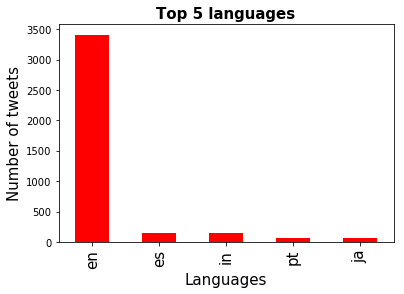

In [93]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

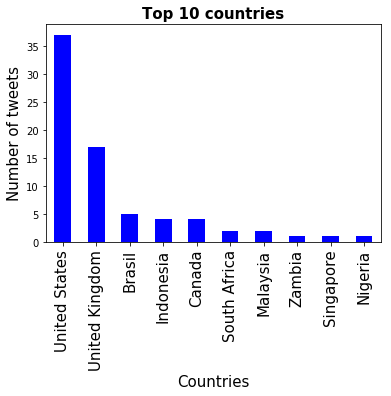

In [97]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='blue')

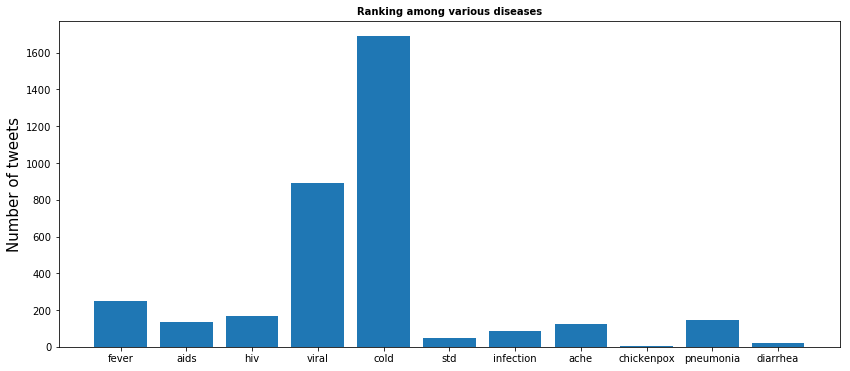

In [95]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['fever'] = tweets['text'].apply(lambda tweet: word_in_text('fever', tweet))
tweets['aids'] = tweets['text'].apply(lambda tweet: word_in_text('aids', tweet))
tweets['hiv'] = tweets['text'].apply(lambda tweet: word_in_text('hiv', tweet))
tweets['viral'] = tweets['text'].apply(lambda tweet: word_in_text('viral', tweet))
tweets['cold'] = tweets['text'].apply(lambda tweet: word_in_text('cold', tweet))
tweets['std'] = tweets['text'].apply(lambda tweet: word_in_text('std', tweet))
tweets['infection'] = tweets['text'].apply(lambda tweet: word_in_text('infection', tweet))
tweets['ache'] = tweets['text'].apply(lambda tweet: word_in_text('ache', tweet))
tweets['chickenpox'] = tweets['text'].apply(lambda tweet: word_in_text('chickenpox', tweet))
tweets['pneumonia'] = tweets['text'].apply(lambda tweet: word_in_text('pneumonia', tweet))
tweets['diarrhea'] = tweets['text'].apply(lambda tweet: word_in_text('diarrhea', tweet))

diseases = ['fever', 'aids', 'hiv', 'viral', 'cold', 'std', 'infection', 'ache', 'chickenpox', 'pneumonia', 'diarrhea']
tweets_by_diseases = [tweets['fever'].value_counts()[True], tweets['aids'].value_counts()[True], tweets['hiv'].value_counts()[True],
                      tweets['viral'].value_counts()[True], tweets['cold'].value_counts()[True], tweets['std'].value_counts()[True],
                      tweets['infection'].value_counts()[True], tweets['ache'].value_counts()[True], tweets['chickenpox'].value_counts()[True],
                      tweets['pneumonia'].value_counts()[True], tweets['diarrhea'].value_counts()[True]]

x_pos = list(range(len(diseases)))
fig, ax = plt.subplots(figsize=(14, 6))
plt.bar(x_pos, tweets_by_diseases)

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking among various diseases', fontsize=10, fontweight='bold')
plt.xticks(x_pos, diseases)
plt.show()


Here cold and viral is mostly referred in tweets in a way which is not related to diseases so let's see the plo without it.

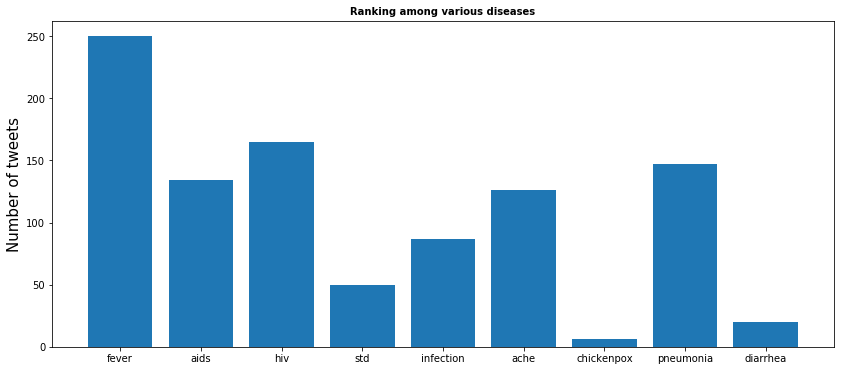

In [96]:
diseases1 = ['fever', 'aids', 'hiv', 'std', 'infection', 'ache', 'chickenpox', 'pneumonia', 'diarrhea']
tweets_by_diseases1 = [tweets['fever'].value_counts()[True], tweets['aids'].value_counts()[True], tweets['hiv'].value_counts()[True],
                      tweets['std'].value_counts()[True], tweets['infection'].value_counts()[True], tweets['ache'].value_counts()[True], tweets['chickenpox'].value_counts()[True],
                      tweets['pneumonia'].value_counts()[True], tweets['diarrhea'].value_counts()[True]]

x_pos1 = list(range(len(diseases1)))
fig1, ax1 = plt.subplots(figsize=(14, 6))
plt.bar(x_pos1, tweets_by_diseases1)

# Setting axis labels and ticks
ax1.set_ylabel('Number of tweets', fontsize=15)
ax1.set_title('Ranking among various diseases', fontsize=10, fontweight='bold')
plt.xticks(x_pos1, diseases1)
plt.show()
